In [1]:
import pickle
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
with open('data/generation_sequences_women_data.pkl', 'rb') as f:
    generation_sequences_women_data = pickle.load(f)
    
with open('data/generation_sequences_women_label.pkl', 'rb') as f:
    generation_sequences_women_label = pickle.load(f)
    
with open('data/generation_sequences_men_data.pkl', 'rb') as f:
    generation_sequences_men_data = pickle.load(f)
    
with open('data/generation_sequences_men_label.pkl', 'rb') as f:
    generation_sequences_men_label = pickle.load(f)
    
with open('data/genre_sequences_data.pkl', 'rb') as f:
    genre_sequences_data = pickle.load(f)
    
with open('data/genre_sequences_label.pkl', 'rb') as f:
    genre_sequences_label = pickle.load(f)

In [4]:
from gsa.reader import ReadFromCSV
from gsa.metrics import accuracy_score_with_unclassified_objects, CostValueAbstainingClassifiers, tpr_fpr_nonclass
from gsa.classifier import ClassifierBySequencePatterns, ClassifierByClosureSequencePatterns,\
    ClassifierByHypothesisPatterns

### Classification by Gender
Строим классификатор для определния пола

In [66]:
data = genre_sequences_data
label = genre_sequences_label

In [67]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [68]:
sum(label)

3314

In [69]:
sum(label) / len(label)

0.5001509206157562

In [70]:
sum(y_train) / len(y_train)

0.49668419849073864

In [71]:
sum(y_test) / len(y_test)

0.5068797159343098

In [72]:
tpr_list = []
fpr_list = []
non_cl_rate_list = []
print('min_sup;min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    for min_growth_rate in [1.5, 1.25, 2, 2.25, 3, 3.5, 5, 7]:
        classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=min_growth_rate)
        classifier.fit(X_train, y_train)
        test_pred = classifier.predict(X_test)
        acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
        tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
        if not math.isnan(acc) and not(tpr == fpr == 1.0):
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            non_cl_rate_list.append(non_cl_num/len(y_test))
            print(f'{min_sup};{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;min_growth_rate;accuracy;TPR;FPR;non_classified_rate
0.001;1.5;0.6093432633716994;0.603905160390516;0.38552631578947366;0.3444296493564137
0.001;1.25;0.6129032258064516;0.6767983789260384;0.45035105315947843;0.11939636040834443
0.001;2;0.635875402792696;0.6644591611479028;0.3912133891213389;0.5867731913004882
0.001;2.25;0.6463245492371706;0.631578947368421;0.3403693931398417;0.6799822458943631
0.001;3;0.679814385150812;0.576530612244898;0.23404255319148937;0.808699511762095
0.001;3.5;0.7033898305084746;0.5512820512820513;0.17676767676767677;0.8428761651131824
0.001;5;0.723404255319149;0.5742574257425742;0.16417910447761194;0.8956946293830448
0.001;7;0.7734806629834254;0.6883116883116883;0.16346153846153846;0.9196626719928983
0.004;1.5;0.6162613981762918;0.5846153846153846;0.35285285285285284;0.415889924545051
0.004;1.25;0.6051121544079291;0.6687631027253669;0.45794392523364486;0.14913448735019974
0.004;2;0.62339514978602;0.6703601108033241;0.4264705882352941;0.6888592987128274


/Users/dgizdatullin/.pyenv/versions/common3/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/dgizdatullin/.pyenv/versions/common3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.025;1.5;0.6200762388818297;0.5514705882352942;0.30606860158311344;0.650687971593431
0.025;1.25;0.5793758480325645;0.7029569892473119;0.5465753424657535;0.3457612072791833
0.025;2;0.6549295774647887;0.8554913294797688;0.6576576576576577;0.8739458499778073
0.04;1.5;0.6212914485165794;0.4249084249084249;0.2;0.7456724367509987
0.04;1.25;0.5803921568627451;0.6764132553606238;0.5167652859960552;0.5472703062583223
0.04;2;0.6443514644351465;0.8226950354609929;0.6122448979591837;0.893919218819352
0.05;1.5;0.6018735362997658;0.315;0.14537444933920704;0.8104749223257879
0.05;1.25;0.5640732265446224;0.6681818181818182;0.5414746543778802;0.6120727918331114


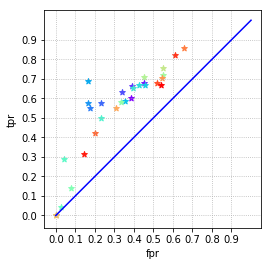

In [73]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [0, 1], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(fpr_list[i], tpr_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

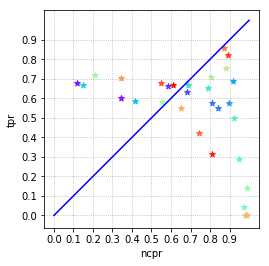

In [74]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [0, 1], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(non_cl_rate_list[i], tpr_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('ncpr')
plt.ylabel('tpr')
plt.show()

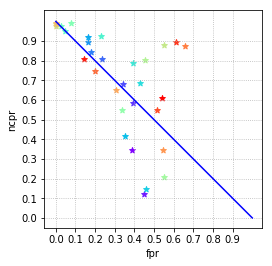

In [75]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [1, 0], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(fpr_list[i], non_cl_rate_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('fpr')
plt.ylabel('ncpr')
plt.show()

In [76]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=7)

In [77]:
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
gender_0_patterns = classifier.important_rules(0)
gender_1_patterns = classifier.important_rules(1)

Выбрали паттерны с самым большим growth_rate, при этом удовлетворяющие минимальной поддержке 0.003

In [78]:
sorted((filter(lambda x: x[1][1] > 0.003, gender_0_patterns)), key=lambda x: -x[1][0])[0: 5]

[([['parting'], ['marriage'], ['education']], [inf, 0.0031803725579282144]),
 ([['work'], ['separation'], ['marriage'], ['children'], ['divorce']],
  [inf, 0.0031803725579282144]),
 ([['education'], ['parting'], ['work'], ['separation']],
  [inf, 0.0031803725579282144]),
 ([['parting'], ['separation'], ['marriage'], ['children']],
  [inf, 0.003634711494775102]),
 ([['separation'],
   ['education'],
   ['work'],
   ['marriage'],
   ['children'],
   ['divorce'],
   ['parting'],
   ['parting']],
  [inf, 0.003634711494775102])]

In [79]:
sorted((filter(lambda x: x[1][1] > 0.003, gender_1_patterns)), key=lambda x: -x[1][0])[0: 5]

[([['separation'], ['work'], ['education'], ['marriage'], ['divorce']],
  [9.120165745856353, 0.004143646408839779]),
 ([['separation'],
   ['work'],
   ['education'],
   ['parting'],
   ['children'],
   ['marriage']],
  [8.10681399631676, 0.003683241252302026]),
 ([['work'],
   ['education'],
   ['parting'],
   ['children'],
   ['marriage'],
   ['separation']],
  [8.10681399631676, 0.003683241252302026]),
 ([['education'], ['separation'], ['marriage'], ['children'], ['work']],
  [7.093462246777165, 0.0032228360957642726]),
 ([['work'],
   ['separation'],
   ['parting'],
   ['children'],
   ['marriage'],
   ['education']],
  [7.093462246777165, 0.0032228360957642726])]

### Women generations

In [30]:
data = generation_sequences_women_data
label = generation_sequences_women_label

In [31]:
sum(label)

1386

In [32]:
sum(label) / len(label)

0.41847826086956524

In [33]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [34]:
sum(y_train) / len(y_train)

0.41464530892448515

In [35]:
sum(y_test) / len(y_test)

0.4259094942324756

Tunning minimal support for women

In [36]:
print('min_sup;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=1.5)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    if not math.isnan(acc) and not(tpr == fpr == 1.0):
        print(f'{min_sup};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;accuracy;TPR;FPR;non_classified_rate
0.001;0.6;0.5231607629427792;0.34555984555984554;0.21472937000887313
0.004;0.6142857142857143;0.5352112676056338;0.32783505154639175;0.2546583850931677
0.01;0.6268260292164675;0.49683544303797467;0.2791762013729977;0.3318544809228039
0.025;0.629080118694362;0.45907473309608543;0.24936386768447838;0.40195208518189884
0.04;0.6557093425605537;0.4;0.16272189349112426;0.487133984028394
0.05;0.6576576576576577;0.36283185840707965;0.1398176291793313;0.5075421472937001
0.1;0.6581395348837209;0.296969696969697;0.1169811320754717;0.6184560780834073


Tuning of minimal growth rate for women

In [37]:
print('min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_growth_rate in [1.5, 2, 2.25, 3, 5, 7]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.004,
                                                 threshold_for_growth_rate=min_growth_rate)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    print(f'{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_growth_rate;accuracy;TPR;FPR;non_classified_rate
1.5;0.6142857142857143;0.5352112676056338;0.32783505154639175;0.2546583850931677
2;0.6278260869565218;0.49166666666666664;0.2746268656716418;0.4897959183673469
2.25;0.6426858513189448;0.632768361581921;0.35;0.6299911268855368
3;0.6348122866894198;0.6356589147286822;0.36585365853658536;0.7400177462289264
5;0.6330275229357798;0.859375;0.6888888888888889;0.9032830523513753
7;0.6896551724137931;0.9411764705882353;0.6666666666666666;0.9485359361135759


In [38]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.004,
                                                 threshold_for_growth_rate=2.25)
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
print(acc, tpr, fpr, non_cl_num/len(y_test))

0.6426858513189448 0.632768361581921 0.35 0.6299911268855368


In [39]:
generation_0_patterns = classifier.important_rules(0)
generation_1_patterns = classifier.important_rules(1)

In [45]:
sorted((filter(lambda x: x[1][1] > 0.007, generation_0_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['work'], ['education'], ['separation'], ['children']],
  [7.0836591086786544, 0.007818608287724784]),
 ([['work'], ['marriage'], ['separation'], ['education']],
  [5.1946833463643465, 0.017200938232994525]),
 ([['work'], ['education'], ['marriage'], ['children'], ['separation']],
  [4.958561376075059, 0.01641907740422205]),
 ([['work'], ['marriage'], ['separation'], ['education'], ['children']],
  [4.958561376075059, 0.01641907740422205]),
 ([['work'], ['marriage'], ['education'], ['children']],
  [4.604378420641126, 0.010164190774042221]),
 ([['work'], ['marriage'], ['education']],
  [4.486317435496482, 0.014855355746677092]),
 ([['work'], ['marriage'], ['education'], ['children'], ['separation']],
  [4.250195465207193, 0.009382329945269743]),
 ([['education'], ['work'], ['separation'], ['marriage']],
  [4.037685691946833, 0.044566067240031274]),
 ([['education'], ['separation'], ['work'], ['marriage'], ['children']],
  [3.777951524628616, 0.012509773260359656]),
 ([['education'],

In [46]:
sorted((filter(lambda x: x[1][1] > 0.007, generation_1_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['parting'], ['separation'], ['work']], [inf, 0.00772626931567329]),
 ([['separation'], ['parting'], ['work']], [inf, 0.00772626931567329]),
 ([['parting'], ['education'], ['work']],
  [14.116997792494482, 0.011037527593818985]),
 ([['marriage'], ['separation'], ['education'], ['children']],
  [10.587748344370862, 0.016556291390728478]),
 ([['parting'], ['education']], [9.881898454746137, 0.01545253863134658]),
 ([['parting'], ['marriage'], ['children']],
  [9.881898454746137, 0.00772626931567329]),
 ([['marriage'], ['education'], ['children']],
  [9.881898454746137, 0.00772626931567329]),
 ([['marriage'], ['separation'], ['education'], ['children'], ['work']],
  [8.47019867549669, 0.013245033112582781]),
 ([['parting'], ['work']], [6.352649006622517, 0.009933774834437087]),
 ([['parting']], [5.152704194260486, 0.08057395143487858])]

### Men generations

In [47]:
data = generation_sequences_men_data
label = generation_sequences_men_label

In [48]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [49]:
sum(label)

1711

In [50]:
sum(y_train) / len(y_train)

0.5098308184727938

In [51]:
sum(y_test) / len(y_test)

0.5288376220053239

Tunning minimal support for men

In [52]:
print('min_sup;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=1.5)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    if not math.isnan(acc) and not(tpr == fpr == 1.0):
        print(f'{min_sup};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;accuracy;TPR;FPR;non_classified_rate
0.001;0.6526005888125613;0.6624087591240876;0.35881104033970274;0.09582963620230701
0.004;0.6294058408862034;0.6629001883239172;0.4090909090909091;0.1188997338065661
0.01;0.6210855949895616;0.6225296442687747;0.3805309734513274;0.14995563442768411
0.025;0.6185682326621924;0.6394849785407726;0.40420560747663553;0.2067435669920142
0.04;0.5956632653061225;0.5919395465994962;0.4005167958656331;0.30434782608695654
0.05;0.5956632653061225;0.5919395465994962;0.4005167958656331;0.30434782608695654
0.1;0.6012526096033403;0.8671586715867159;0.7451923076923077;0.5749778172138421


Tuning of minimal growth rate for men

In [53]:
print('min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_growth_rate in [1.5, 2, 2.25, 3, 5, 7]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=min_growth_rate)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    print(f'{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_growth_rate;accuracy;TPR;FPR;non_classified_rate
1.5;0.6526005888125613;0.6624087591240876;0.35881104033970274;0.09582963620230701
2;0.7284122562674095;0.6876640419947506;0.22551928783382788;0.3629103815439219
2.25;0.7362637362637363;0.7071005917159763;0.23076923076923078;0.43478260869565216
3;0.7734553775743707;0.7435897435897436;0.1921182266009852;0.6122448979591837
5;0.8448275862068966;0.8475609756097561;0.15873015873015872;0.7426796805678794
7;0.9205607476635514;0.9473684210526315;0.12345679012345678;0.8101153504880213


In [54]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=2.25)
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
print(acc, tpr, fpr, non_cl_num/len(y_test))

0.7362637362637363 0.7071005917159763 0.23076923076923078 0.43478260869565216


In [55]:
generation_0_patterns = classifier.important_rules(0)
generation_1_patterns = classifier.important_rules(1)

In [56]:
sorted((filter(lambda x: x[1][1] > 0.02, generation_0_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['work'], ['marriage'], ['children'], ['education'], ['separation']],
  [6.240671641791044, 0.022388059701492536]),
 ([['work'], ['marriage'], ['children'], ['education']],
  [5.824626865671641, 0.026119402985074626]),
 ([['separation'], ['work'], ['education'], ['marriage']],
  [5.011448439620081, 0.049440298507462684]),
 ([['work'], ['separation'], ['marriage'], ['children'], ['education']],
  [4.94053171641791, 0.03544776119402985]),
 ([['separation'], ['work'], ['education'], ['marriage'], ['children']],
  [4.680503731343284, 0.04197761194029851]),
 ([['work'], ['separation'], ['marriage']],
  [4.240456371986222, 0.049440298507462684]),
 ([['work'], ['marriage'], ['children']],
  [3.9004197761194033, 0.04197761194029851]),
 ([['work'], ['education'], ['separation'], ['marriage'], ['children']],
  [2.730293843283582, 0.03917910447761194]),
 ([['work'], ['marriage'], ['separation'], ['children'], ['education']],
  [2.6745735607675907, 0.033582089552238806]),
 ([['work'], ['marriag

In [57]:
sorted((filter(lambda x: x[1][1] > 0.02, generation_1_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['education'],
   ['work'],
   ['parting'],
   ['separation'],
   ['marriage'],
   ['children']],
  [inf, 0.02062780269058296]),
 ([['education'], ['work'], ['parting'], ['separation'], ['marriage']],
  [23.074439461883408, 0.021524663677130046]),
 ([['education'], ['work'], ['parting'], ['separation']],
  [4.422600896860987, 0.04125560538116592]),
 ([['education'], ['marriage']], [3.8457399103139016, 0.04304932735426009]),
 ([['separation'], ['parting']], [3.571044202434337, 0.023318385650224215]),
 ([['education'], ['work'], ['parting']],
  [2.72406576980568, 0.06098654708520179]),
 ([['education'], ['work'], ['separation'], ['parting']],
  [2.4997309417040356, 0.03497757847533632]),
 ([['separation'],
   ['education'],
   ['work'],
   ['parting'],
   ['marriage'],
   ['children']],
  [2.457000498256104, 0.02062780269058296]),
 ([['parting']], [2.3074439461883407, 0.03228699551569507]),
 ([['work'], ['education'], ['parting']],
  [2.2926526388409796, 0.02780269058295964])]